In [1]:
import context
from utils.datasets import QuarterFastMRI, MNISTTrainDataset, FastMRIBrainTrain
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import Normalize
from torchvision.io import read_image
from torchvision.utils import make_grid

In [2]:
ds = FastMRIBrainTrain("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=64)
dl = DataLoader(ds, batch_size=100)

In [3]:
x = next(iter(dl))[0]

In [4]:
x.shape

torch.Size([100, 1, 64, 64])

In [5]:
x.max()

tensor(1.)

In [6]:
x.min()

tensor(0.)

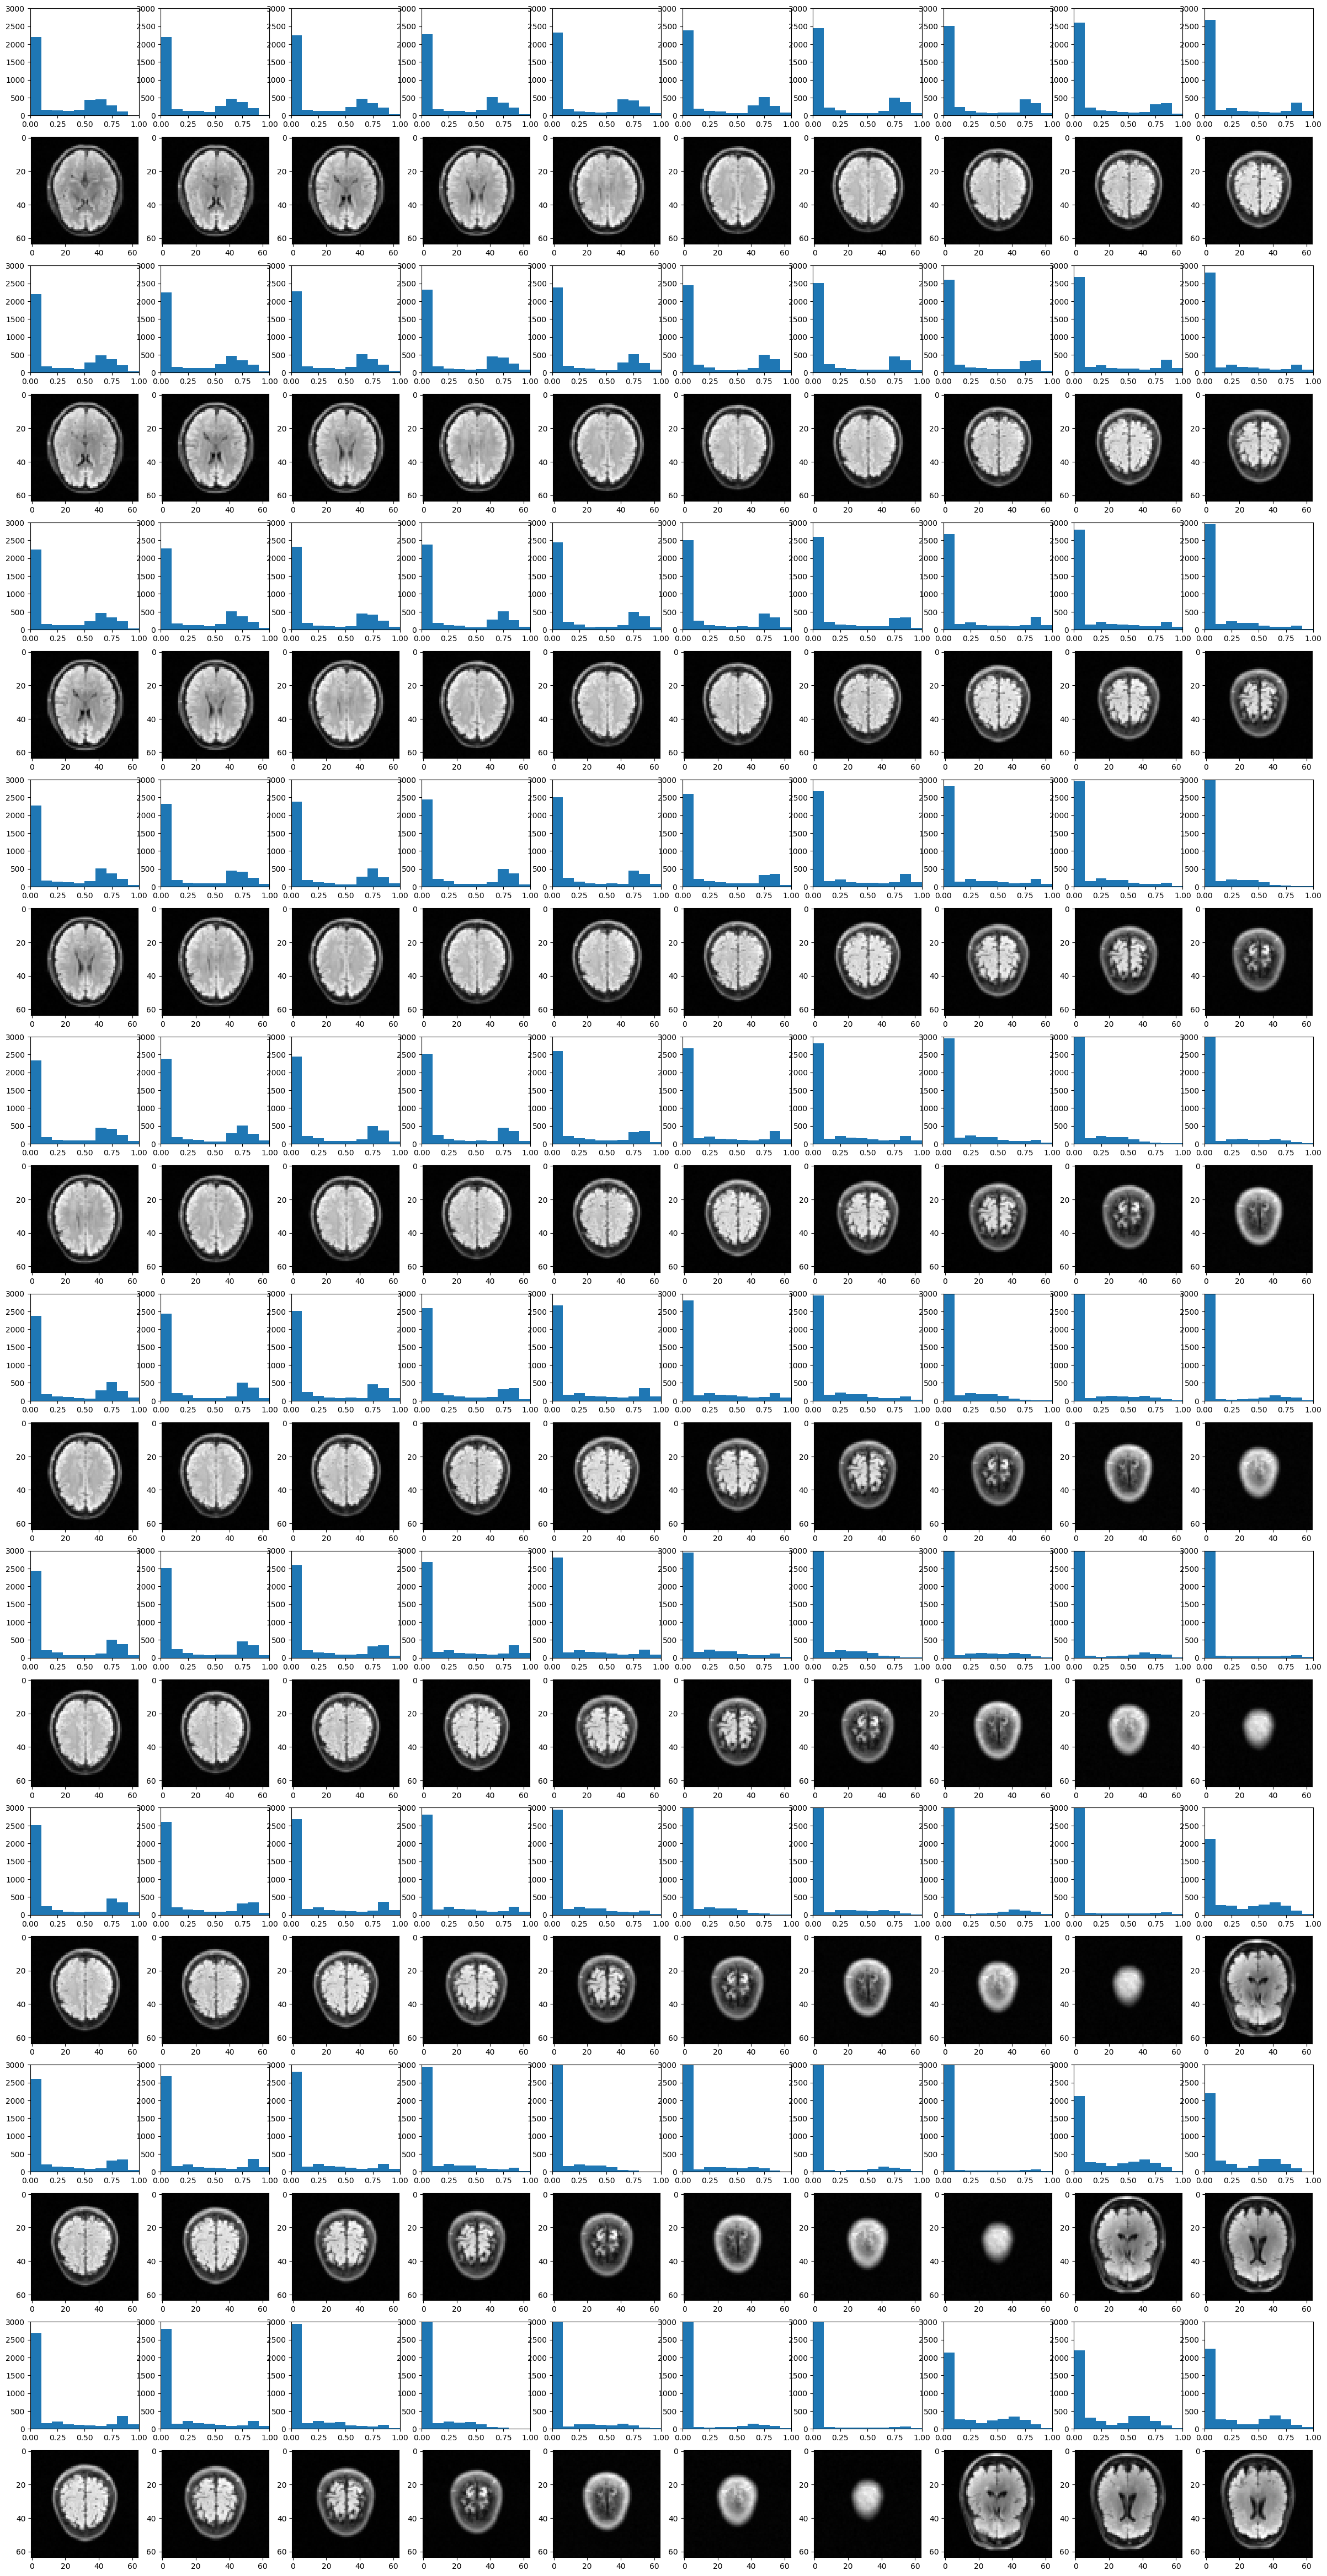

In [7]:
fig, ax = plt.subplots(20,10, figsize=(30,60))
for i in range(10):
    for j in range(10):
        ax[i*2,j].hist(x[i+j].view(-1))
        ax[i*2,j].set_xlim([0,x.max()])
        ax[i*2,j].set_ylim([0,3000])
        ax[(i+1)*2-1,j].imshow(x[i+j].permute(1,2,0), cmap="gray")

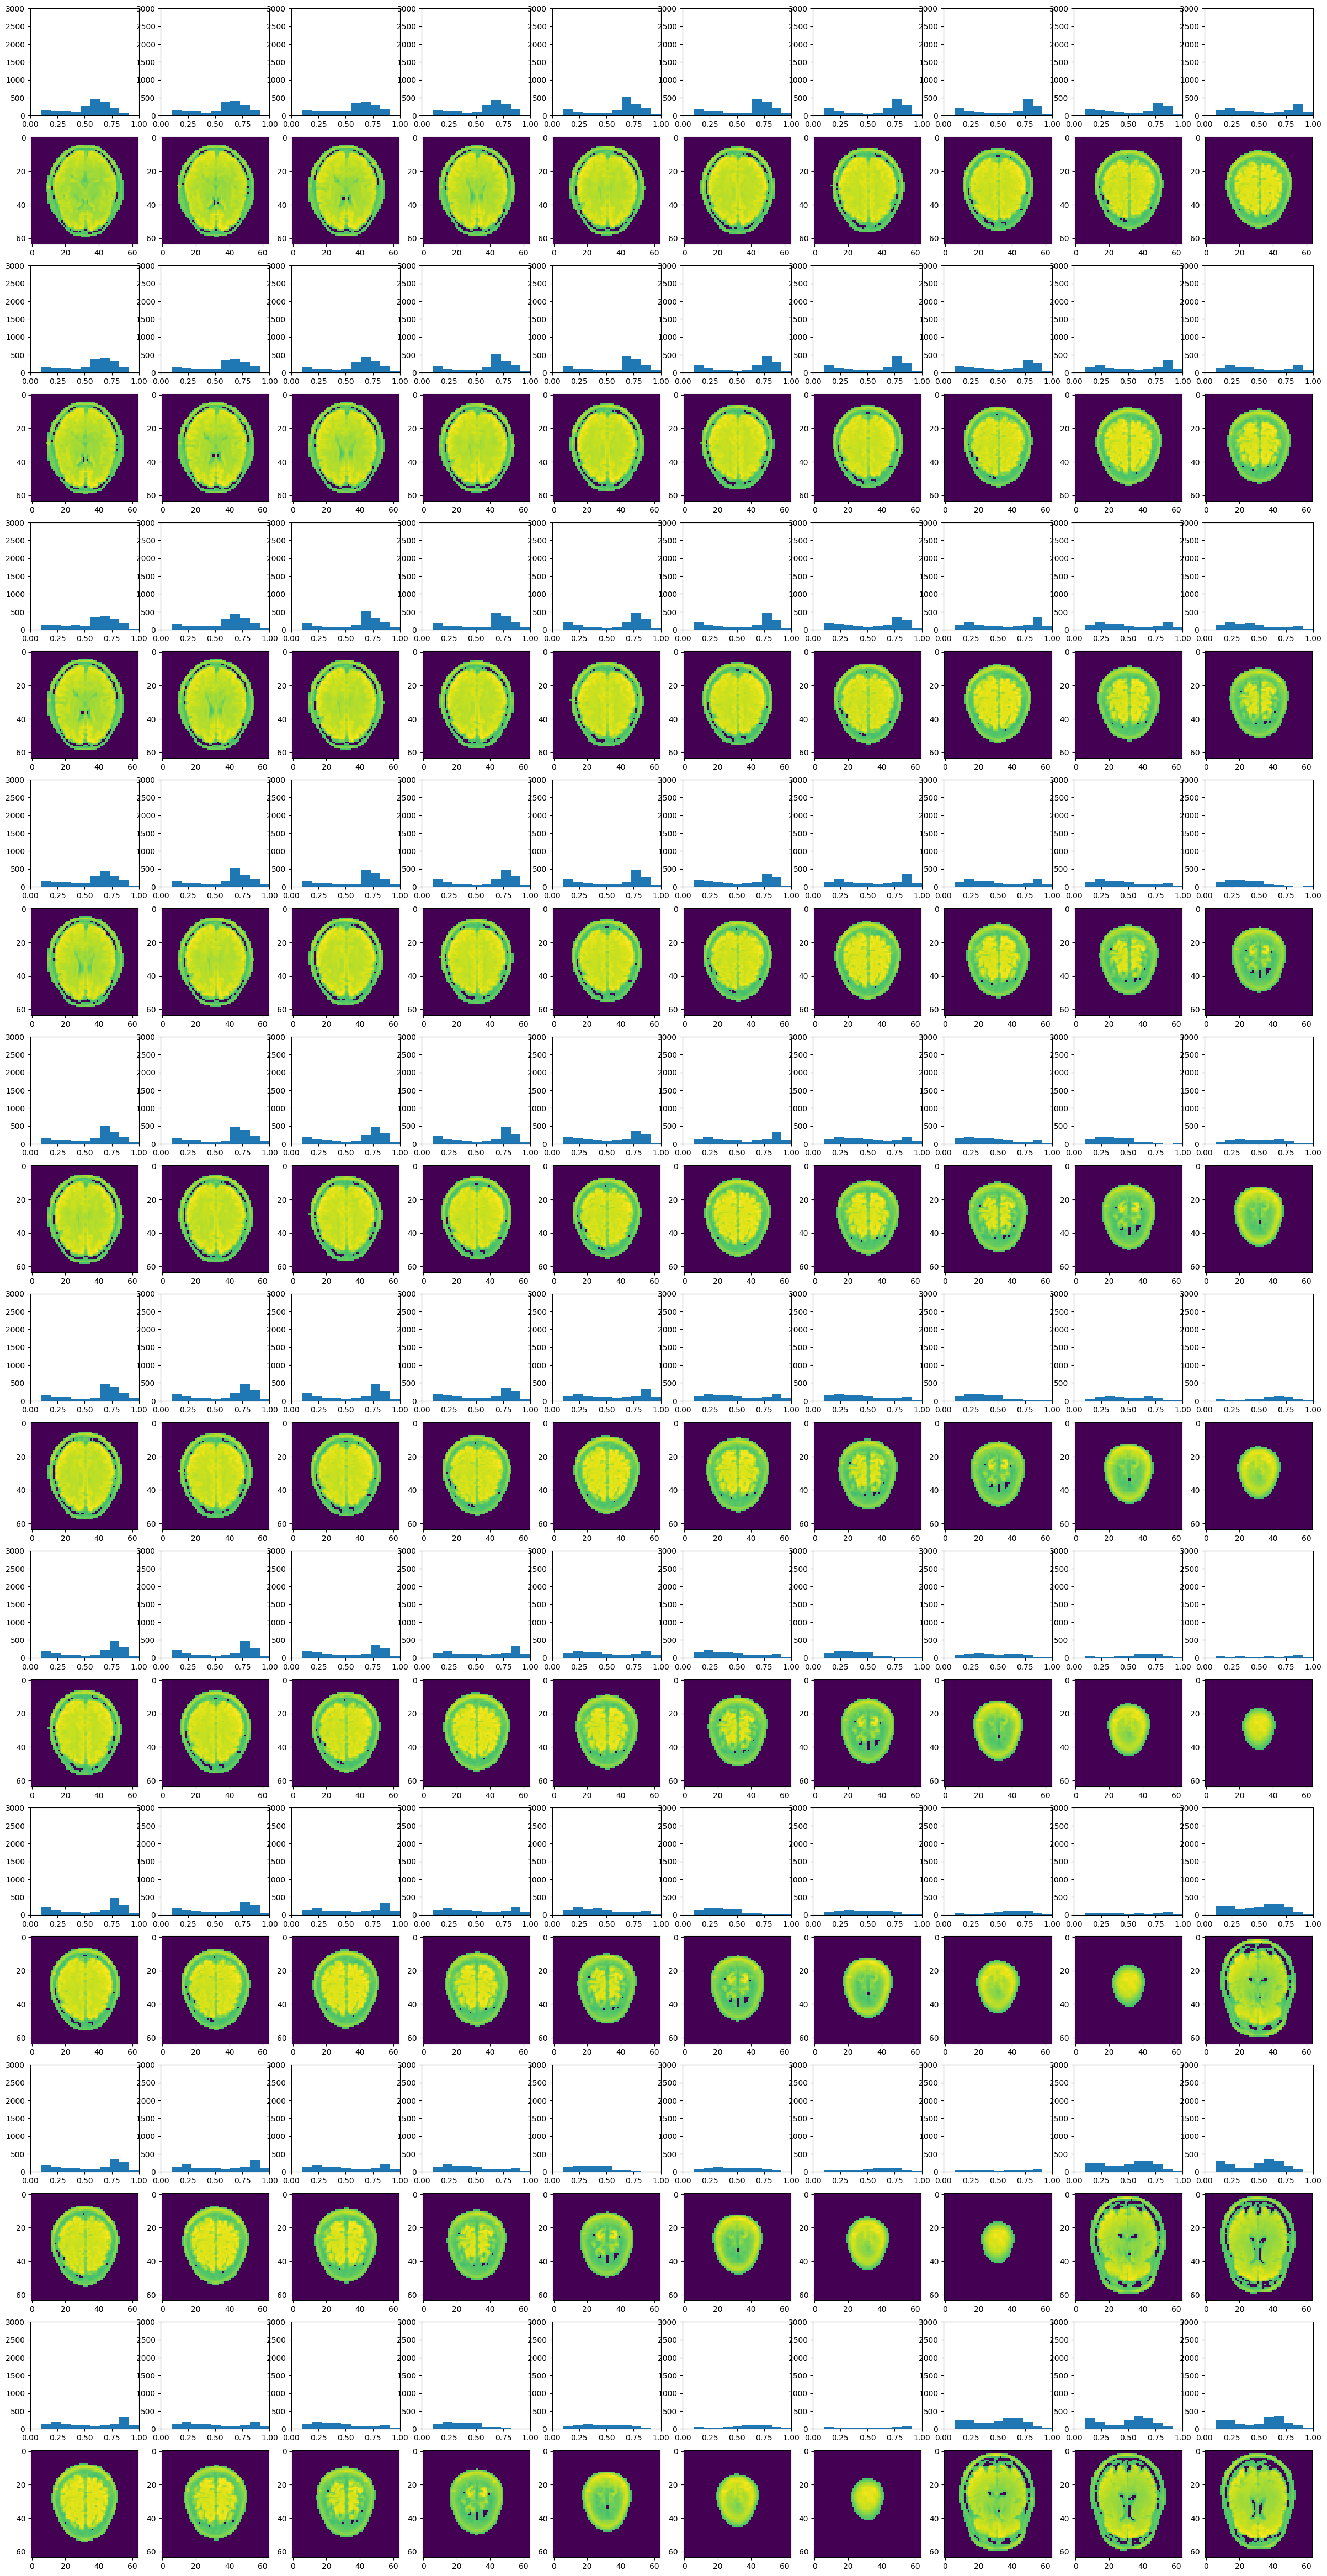

In [16]:
threshold = 0.07
x[x<threshold] = -2
fig, ax = plt.subplots(20,10, figsize=(30,60))
for i in range(10):
    for j in range(10):
        ax[i*2,j].hist(x[i+j][x[i+j]>0].view(-1))
        ax[i*2,j].set_xlim([0,x.max()])
        ax[i*2,j].set_ylim([0,3000])
        ax[(i+1)*2-1,j].imshow(x[i+j].permute(1,2,0))

In [ ]:
x